# Capstone Two: Exploratory Data Analysis

In [2]:
# import libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')


In [3]:
# loading clean data
df = pd.read_csv('data/cleanData.csv')
df.head()

,userId,productId,userRating,productName,productRating,noOfRatings,price
0,1,44,2.1,"Samsung Galaxy M04 Light Green, 4GB RAM, 64GB ...",4.0,703,147.160
1,1,30,2.1,Hammer Ace 3.0 Bluetooth Calling Smart Watch w...,3.9,844,61.308
2,1,50,1.6,"Redmi 10A (Slate Grey, 4GB RAM, 64GB Storage) ...",4.0,254,147.160
3,1,4,4.6,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...",4.1,701,306.592
4,1,3,2.0,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,4.2,54,28.197


In [4]:
#Stats 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,86465.0,5996.300584,3463.975651,1.0000,2995.000,5993.000,8996.0000,12000.000
productId,86465.0,25.561117,14.416922,1.0000,13.000,26.000,38.0000,50.000
userRating,86465.0,3.004235,1.153766,1.0000,2.000,3.000,4.0000,5.000
productRating,86465.0,4.034567,0.397229,2.5000,4.000,4.100,4.3000,4.600
noOfRatings,86465.0,526.301290,283.258477,8.0000,287.000,539.000,765.0000,965.000
price,86465.0,125.093974,129.264361,4.8945,28.197,55.068,233.0055,551.876


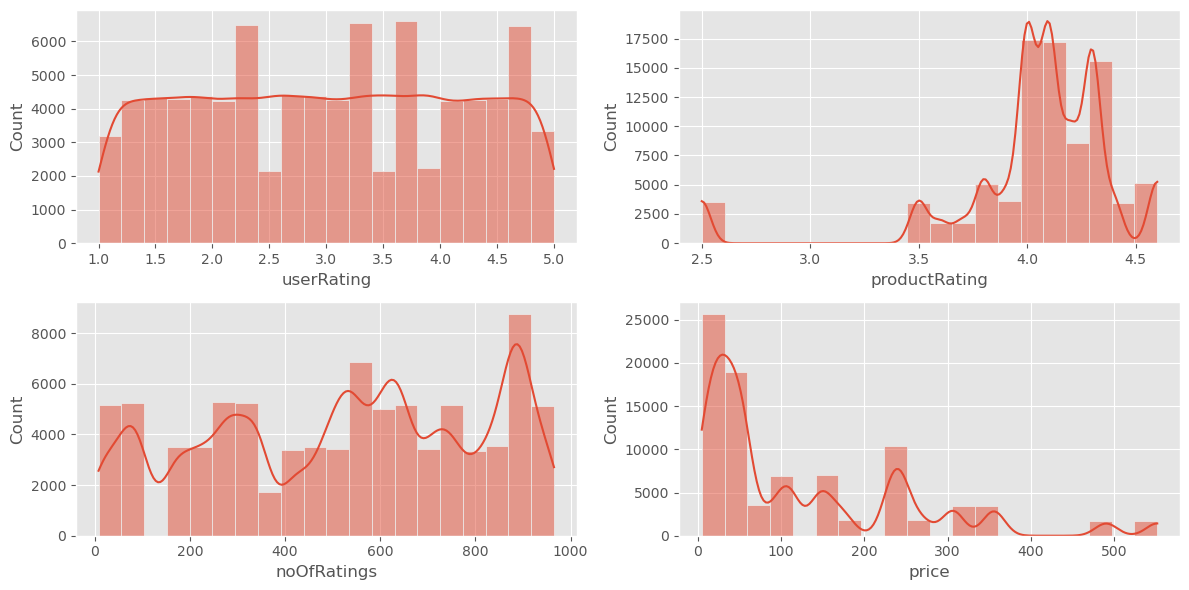

In [5]:
# Explore the distribution of numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(['userRating', 'productRating', 'noOfRatings', 'price']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=20, kde=True)
plt.tight_layout()
plt.show()

               productId  userRating  productRating  noOfRatings     price
productId       1.000000   -0.001876       0.035364     0.083418 -0.264811
userRating     -0.001876    1.000000      -0.000755     0.003632  0.000518
productRating   0.035364   -0.000755       1.000000     0.074773  0.326968
noOfRatings     0.083418    0.003632       0.074773     1.000000 -0.051721
price          -0.264811    0.000518       0.326968    -0.051721  1.000000


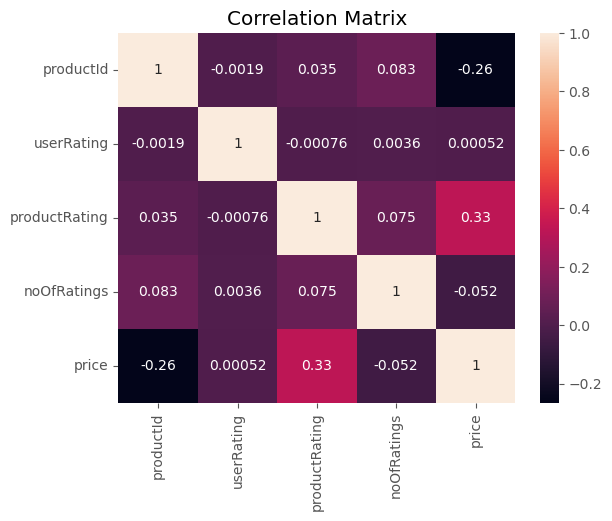

In [6]:
#Select only numeric columns 
numerical_features = ['productId', 'userRating', 'productRating',
       'noOfRatings', 'price']

#Inferential statistics
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

#Data relationships - Data visualization
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

- There is a weak positive correlation (0.327) between productRating and price.

### Since We dont see any high correlation and We'll focus more on Products and Ratings

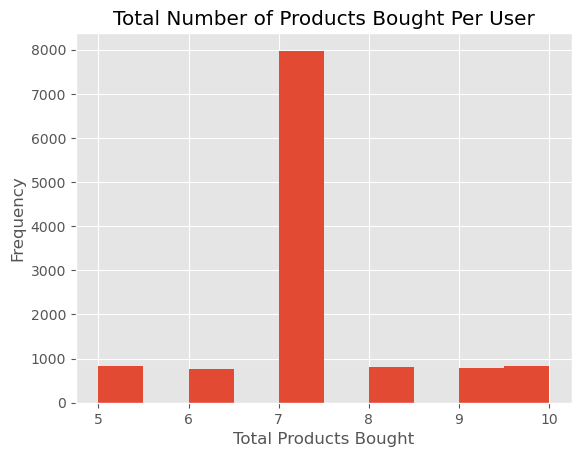

In [7]:
#Total number of products each user bought
user_product_count = df.groupby('userId')['productId'].count()

# Plot the distribution
plt.hist(user_product_count)
plt.title('Total Number of Products Bought Per User')
plt.xlabel('Total Products Bought')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Find products bought min, max, mean
user_product_count.agg(['min','max','mean'])

min      5.000000
max     10.000000
mean     7.205417
Name: productId, dtype: float64

- Most of user have bought atleast 5 products, max is 10 products and average of 7 products

In [9]:
#Top most bought products.
df.groupby(['productName'])['productId'].count().sort_values(ascending=False).head()

productName
OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs...    5089
boAt Airdopes 141 Bluetooth Truly Wireless in Ear Earbuds with 42H Playtime, Beast Mode(Low Latency Upto 80ms) for Gaming,...    3547
boAt Rockerz 255 Pro+ in-Ear Bluetooth Neckband with Upto 40 Hours Playback, ASAP Charge, IPX7, Dual Pairing, BT v5.0, wi...    3412
Hammer Ace 3.0 Bluetooth Calling Smart Watch with Largest 1.85" IPS Display, Dual Mode, Spo2, Heart Rate, Strong Metallic ...    1824
Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus | Travel Adapter...    1796
Name: productId, dtype: int64

In [10]:
#Top most products by ratings
df.groupby('productName')['userRating'].mean().sort_values(ascending=False).head()

productName
Samsung Galaxy M04 Light Green, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery       3.094097
Apple 20W USB-C Power Adapter (for iPhone, iPad & AirPods)                                                                       3.056964
Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus | Travel Adapte...    3.051130
Redmi 10A (Charcoal Black, 4GB RAM, 64GB Storage) | 2 Ghz Octa Core Helio G25 | 5000 mAh Battery | Finger Print Sensor | U...    3.039989
iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RAM, 128GB Storage) | World's First Snapdragon 4 Gen 1 | 120Hz Refresh Rate | ...    3.037867
Name: userRating, dtype: float64

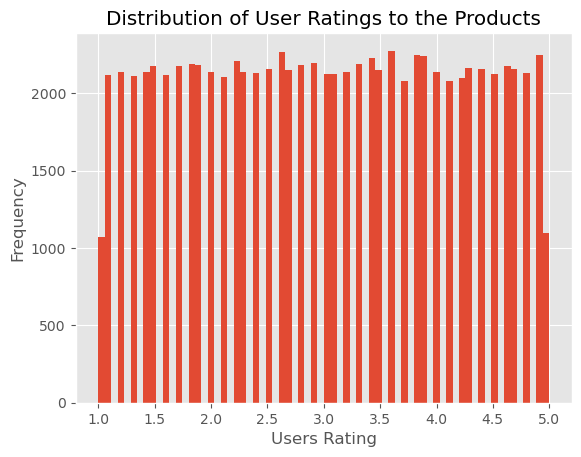

In [11]:
#Distribution of userRating for the products
plt.hist(df['userRating'],bins=70)
plt.title('Distribution of User Ratings to the Products')
plt.xlabel('Users Rating')
plt.ylabel('Frequency')
plt.show()

- The user ratings are too dispersed, so we need to categorize them into manageable bins for a uniform distribution. The bins will be labeled as [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [12]:
# Define the bins for the new ratings
bins = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
# Create labels for the bins
labels = ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']

# Use pd.cut() to create a new column with the new ratings
df['userRating'] = pd.to_numeric(pd.cut(df['userRating'], bins=bins, labels=labels, include_lowest=True))

In [13]:
ratings = pd.DataFrame(df.groupby(['productId'])['userRating'].mean())
ratings.sort_values('userRating',ascending=False).head()

,userRating
productId,
44,3.291117
8,3.256724
4,3.253567
31,3.239278
9,3.238483


In [14]:
ratings['numof_Ratings'] = pd.DataFrame(df.groupby(['productId'])['userRating'].count())
ratings.sort_values('numof_Ratings',ascending=False).head()

,userRating,numof_Ratings
productId,,
30,3.186952,1824
40,3.218457,1815
10,3.195156,1796
13,3.208310,1793
36,3.218049,1784


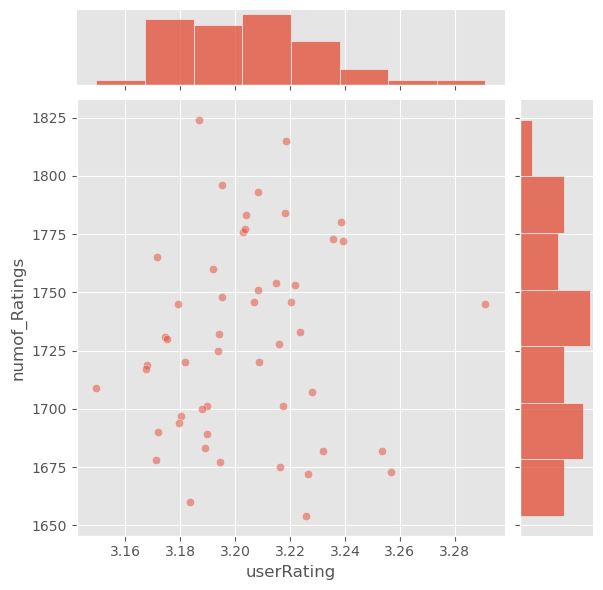

In [15]:
sns.jointplot(x='userRating',y='numof_Ratings', data=ratings,alpha=.5);

# Capstone Two: Pre-processing & Training Data Development

Standardize the datas

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical variables
scaler = MinMaxScaler()
df[['userRating', 'productRating', 'noOfRatings', 'price']] = scaler.fit_transform(df[['userRating', 'productRating', 'noOfRatings', 'price']])

Split the data into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(['productName'], axis=1)
y = df['productName']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)